<a href="https://colab.research.google.com/github/manyasahay/Thyroid-Nodule-Detection/blob/main/nodule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE PROCESSING FOR DETERMINING COLD THYROID NODULES



Image processing can be applied on medical images for detecting abnormalities such as tumors. In our case,we have used image processing for detecting cold nodules in thyroid glands which are cancerous. Reference taken from a research paper titled "Image processing technique for determining cold thyroid nodules".

Link : https://ieeexplore.ieee.org/document/7965547

# Importing libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading image

In [ ]:
img = cv2.imread('/content/drive/MyDrive/pics/thyroidfinal.png') #loading the image

# Image analysis

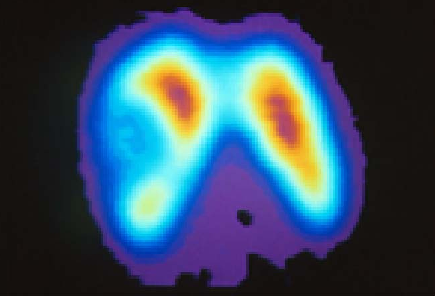

In [ ]:
# Display image
cv2_imshow(img)

In [ ]:
img.shape

(296, 435, 3)

In [ ]:
type(img)

numpy.ndarray

Downscaling

Enter rate of downsampling: 3


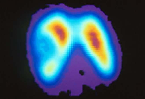

In [ ]:
d=int(input("Enter rate of downsampling: "))
newimg=img[::d,::d]
cv2_imshow(newimg)

# Image enhancement

Blurring

We used a blurring filter which serves the same purpose as a circular averaging filter followed by morphological opening by rect to remove smaller objects and retain the bigger ones

Text(0.5, 1.0, 'filtered image')

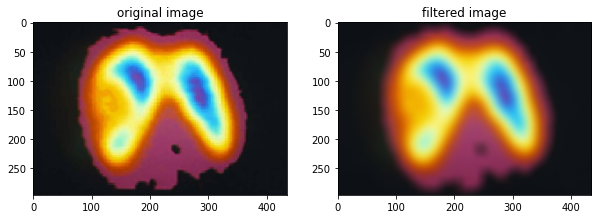

In [ ]:
#applying circular averaging filter
blur = cv2.blur(img,(21,21))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(10,5))
#making a subplot

axes[0].imshow(img)
axes[0].set_title('original image')
axes[1].imshow(blur)
axes[1].set_title('filtered image')

Morphological transformation

Text(0.5, 1.0, 'Image after morphological opening')

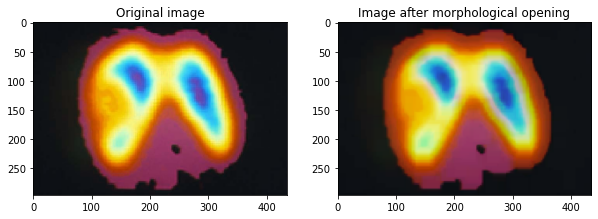

In [ ]:
#structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21,21))
imgx = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(10,5))
#making a subplot

axes[0].imshow(img)
axes[0].set_title('Original image')
axes[1].imshow(imgx)
axes[1].set_title('Image after morphological opening')

Dividing blurred and morphologically opened images

Text(0.5, 1.0, 'Image after dividing')

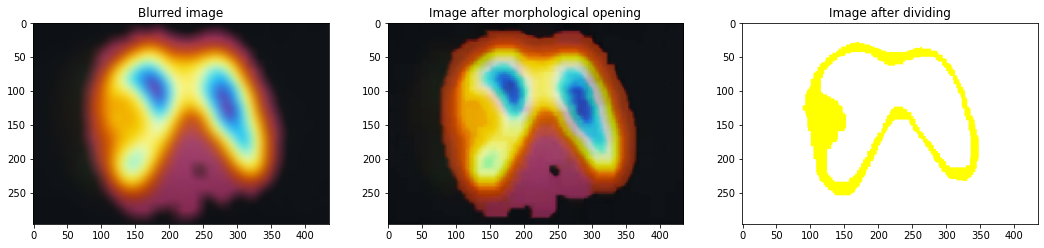

In [ ]:
# Divide the results of the previous processes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize =(18,8))
#making a subplot
img_divided = cv2.divide(blur, imgx, scale=500)
axes[0].imshow(blur)
axes[0].set_title('Blurred image')
axes[1].imshow(imgx)
axes[1].set_title('Image after morphological opening')
axes[2].imshow(img_divided)
axes[2].set_title('Image after dividing')


Converting into grayscale

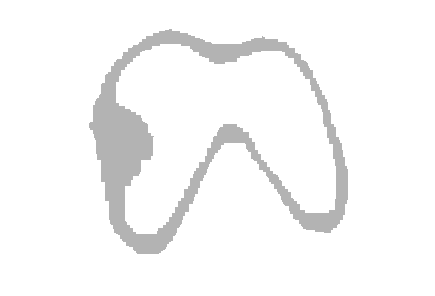

In [ ]:
gray_img = cv2.cvtColor(img_divided, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

# Image Segmentation

Thresholding

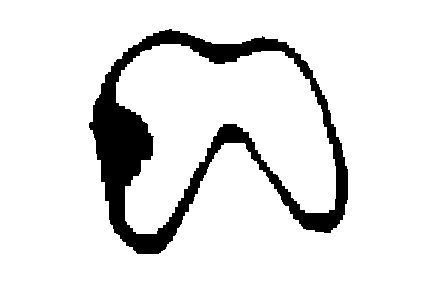

In [ ]:
ret,img_threshold = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow(img_threshold)

Inverting image

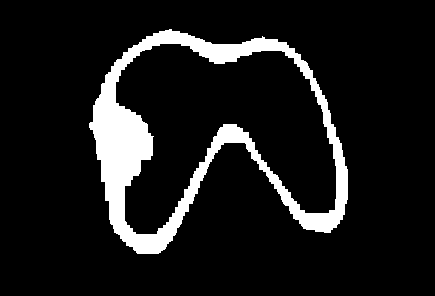

In [ ]:
newimg=(255 - img_threshold)
cv2_imshow(newimg)

# Feature Extraction

Hill climbing algorithm

Text(0.5, 1.0, 'Orignal image with hill climb')

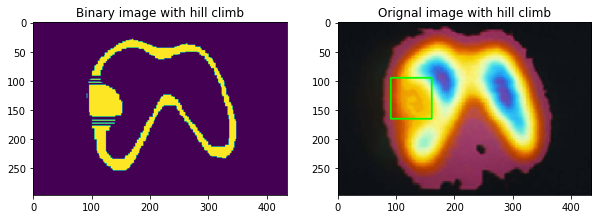

In [ ]:
directions = [(0, -1), (-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1)]


best_point = None
best_count = 0

# Run algorithm 100 times
h,w = newimg.shape
for i in range(100):

    # Chooses a random white pixel to begin with
    while True:
        x = np.random.randint(0, w)
        y = np.random.randint(0, h)
        if newimg[y, x] == 255:
            break

    # Stores the current pixel and the count of neighboring white pixels
    current_point = (x, y)
    current_count = 0

    # Search for white pixels in all directions from initial pixel
    for d in directions:
        x = current_point[0] + d[0]
        y = current_point[1] + d[1]
        while (0 <= x < newimg.shape[1]) and (0 <= y < newimg.shape[0]) and (newimg[y, x] == 255):
            current_count += 1
            x += d[0]
            y += d[1]

    # If the current count is higher than the best count, update the best point and the best count
    if current_count > best_count:
        best_point = current_point
        best_count = current_count

result=img

# Rectangle drawn shows ROI
cv2.rectangle(result, (best_point[0]-35, best_point[1]-35), (best_point[0]+35, best_point[1]+35), (0, 255, 0), 2)
cv2.rectangle(newimg, (best_point[0]-35, best_point[1]-35), (best_point[0]+35, best_point[1]+35), (0, 255, 0), 2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(10,5))
#making a subplot

axes[0].imshow(newimg)
axes[0].set_title('Binary image with hill climb')
axes[1].imshow(result)
axes[1].set_title('Orignal image with hill climb')

